In [2]:
# Cargar bibliotecas necesarias
# Para instalarlas por primera vez: install.packages("ggplot2")
# 
library(lubridate) # For handling Date variables
library(ggplot2)
library(scales) # For percent_format()
library(RColorBrewer)
library(TTR) # for EMA (Exponential Moving Average)

In [3]:
# Leer archivo de datos diarios de una ciudad específica (Por ejemplo Hermosillo)
df0 <- read.csv(file="HMO_II_DGE_1973_2016.txt", header=F, sep=",", stringsAsFactors=FALSE)
df0$V6 <- NULL
names(df0) <- c("date", "Precip", "Evap", "Tmax", "Tmin")

# Convertir a variables numéricas
df0$Precip <- as.numeric(df0$Precip);
df0$Evap <- as.numeric(df0$Evap);
df0$Tmax <- as.numeric(df0$Tmax);
df0$Tmin <- as.numeric(df0$Tmin);

# Cambiar formato de fecha a Año-Mes-Día 
df0$date <- format(as.Date(df0$date, format = "%d/%m/%Y"), "%Y-%m-%d")

# Seleccionar datos de Abril a Noviembre 
df1_tmp1 <- df0[(format.Date(df0$date, "%m") >= "04" & !is.na(df0$date)),]
df1 <- df1_tmp1[(format.Date(df1_tmp1$date, "%m") <= "11" & !is.na(df1_tmp1$date)),]
# Seleccionar los datos entre los años 1981 y 2010
df1_tmp2 <- df1[(format.Date(df1$date, "%Y") >= "1981" & !is.na(df1$date)),]
df2 <- df1_tmp2[(format.Date(df1_tmp2$date, "%Y") <= "2010" & !is.na(df1_tmp2$date)),]

# Agregar clasificación por mes
df2$Month <- factor(month(df2$date),
                         labels = c("Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov"))


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [5]:
# Explorar datos: min, cuartiles, promedio, máximo
MaxT <- df2$Tmax
summary(MaxT)
# Tomar el valor promedio (Mean) para insertarlo en la posición de la línea vertical 
# en el histograma de abajo

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   17.0    33.0    36.5    35.8    39.5    47.5       2 

Mean 
35.8 

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”

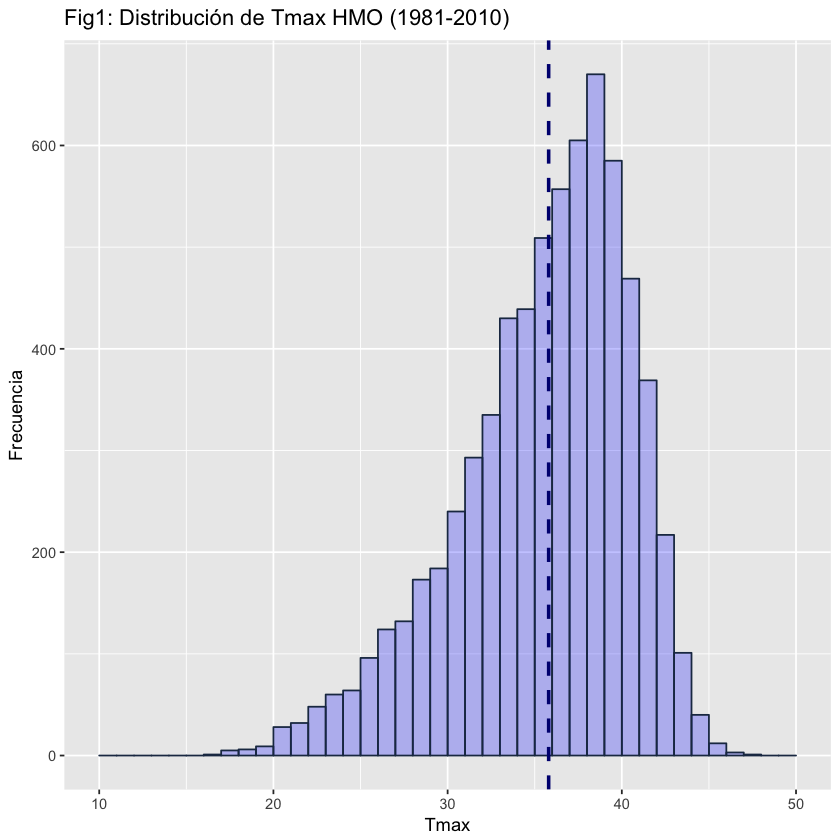

In [26]:
# Histograma de la Climatología de referencia base (1981-2010)
# La línea vertical punteada es el valor promedio de Tmax ... será 35.8ºC para HMO
df2_mean <- as.array(summary(df2$Tmax)[4])
df2_mean
ggplot(data=df2, aes(df2$Tmax)) + 
# Rango de temperaturas entre 10ºC y 50ºC
  geom_histogram(breaks=seq(10, 50), 
                 col="#1F3552", 
                 fill="blue", 
                 alpha = .25) + 
  labs(title="Fig1: Distribución de Tmax HMO (1981-2010)") +
  labs(x="Tmax", y="Frecuencia") +
# Insertar aqui el valor promedio de Tmax: 35.8 para Hermosillo
  geom_vline(xintercept = 35.8, linetype="dashed", 
                color = "navy", size=1.0)
  

In [193]:
summary(df2$Tmax)
sd(df2$Tmax, na.rm=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   17.0    33.0    36.5    35.8    39.5    47.5       2 

[1] 4.941827

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

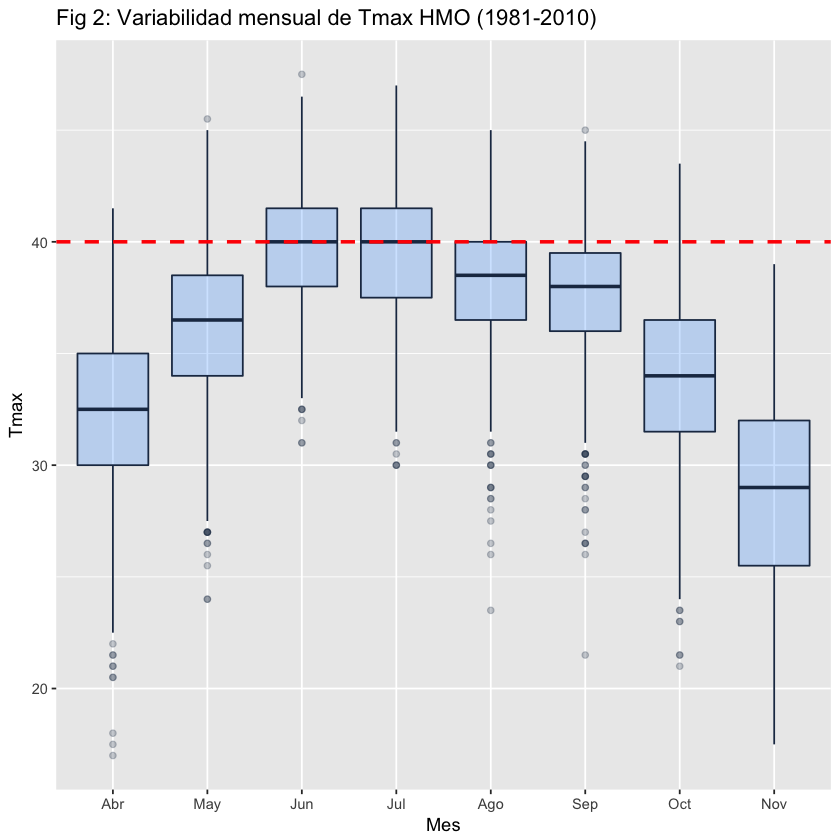

In [181]:
# Gráfica de cajas (boxplot) para mostrar la variabilidad climática
# Proporciona los valores extremos Min, 1er cuartil, Mediana, 3er cuartil y Máx 
# Cada cuartil tiene 25% de los datos.
# Existen un par de datos que se salen de lo normal (anomalías válidas)
fill <- "#3399FF"
line <- "#1F3552"
ggplot(df2, aes(x = Month, y = Tmax)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
        scale_x_discrete(name = "Mes") +
        ggtitle("Fig 2: Variabilidad mensual de Tmax HMO (1981-2010)") +
        geom_hline(yintercept=40, linetype="dashed", color = "red", size=1.0)

In [184]:
# Use los mismos datos del SMN, el complemento...
# Trabajar con el resto de los datos posteriores a 2010
# Seleccionar los datos de los años mayores a 2010
dfNew2 <- df1[(format.Date(df1$date, "%Y") >= "2011" & !is.na(df1$date)),]

# Agregar clasificación por mes
dfNew2$Month <- factor(month(dfNew2$date),
                         labels = c("Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov"))
summary(dfNew2$Tmax)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.00   33.00   37.00   36.21   40.00   48.50 

 Mean 
36.21 

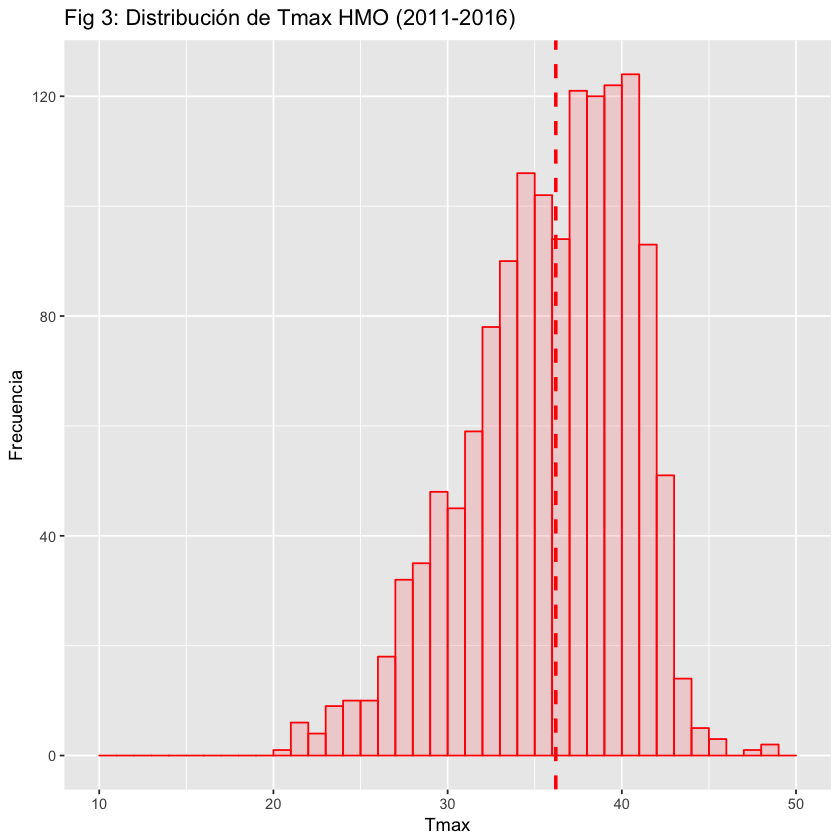

In [185]:
# Producir el histograma de distribución de Tmax
dfNew2_mean <- as.array(summary(dfNew2$Tmax)[4])
dfNew2_mean
ggplot(data=dfNew2, aes(dfNew2$Tmax)) + 
# Rango de temperaturas entre 10ºC y 50ºC
  geom_histogram(breaks=seq(10, 50), 
                 col="red", 
                 fill="#FF6666", 
                 alpha = .2) + 
  labs(title="Fig 3: Distribución de Tmax HMO (2011-2016)") +
  labs(x="Tmax", y="Frecuencia") +
# Insertar aqui el valor promedio de Tmax: 36.21 para Hermosillo
  geom_vline(xintercept = 36.21, linetype="dashed", 
                color = "red", size=1.0)
  

In [194]:
summary(dfNew2$Tmax)
sd(dfNew2$Tmax)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.00   33.00   37.00   36.21   40.00   48.50 

[1] 4.623434

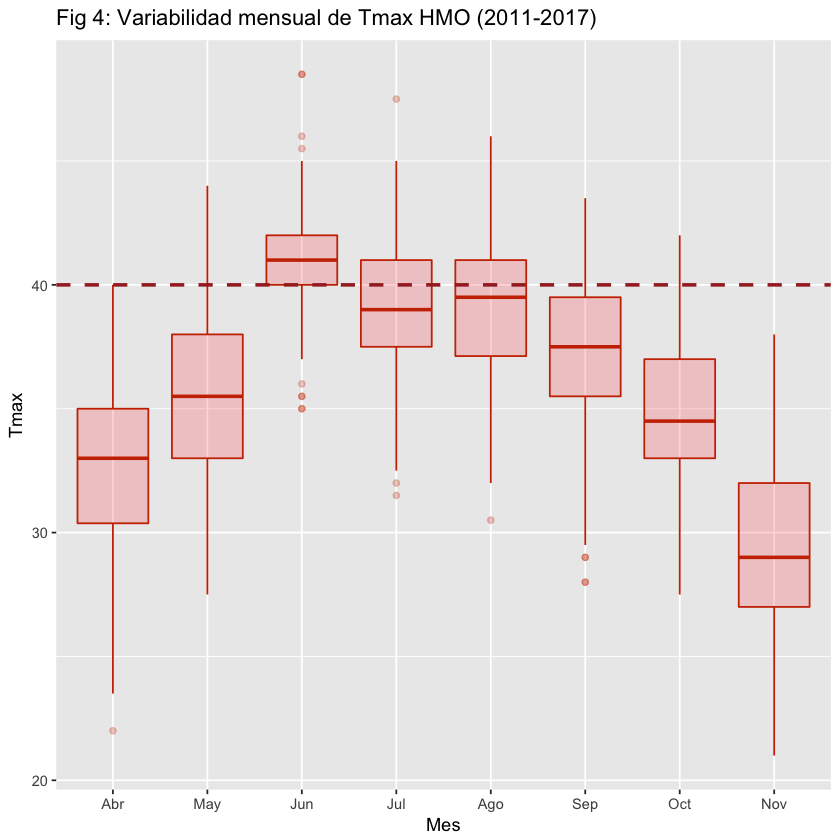

In [189]:
# Producir el diagrama de cajas, para mostrar la variabilidad climática 2011-2017
fill <- "#FF6666"
line <- "#CC3300"
ggplot(dfNew2, aes(x = Month, y = Tmax)) +
        geom_boxplot(fill = fill, colour = line, alpha=0.25) +
        scale_x_discrete(name = "Mes") +
        ggtitle("Fig 4: Variabilidad mensual de Tmax HMO (2011-2017)") +
        geom_hline(yintercept=40, linetype="dashed", color = "brown", size=1.0)


In [196]:
# Resumen de datos (verificar que no hay valores anómalos)
summary(df2$Tmax)
summary(dfNew2$Tmax)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   17.0    33.0    36.5    35.8    39.5    47.5       2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.00   33.00   37.00   36.21   40.00   48.50 

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”

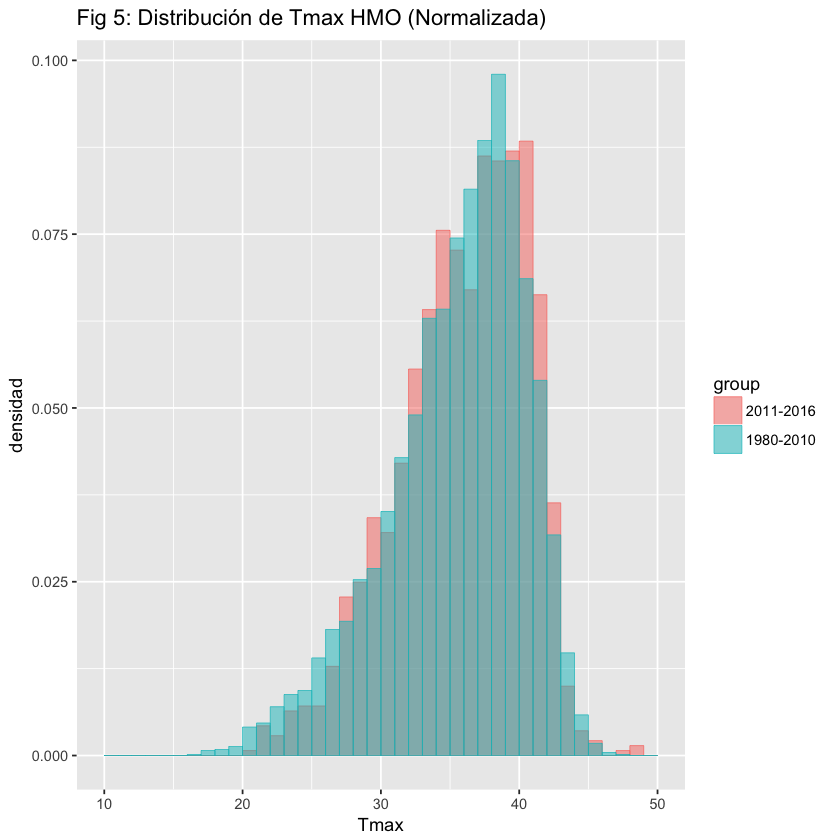

In [37]:
# Combinar los 2 histogramas para hacer la comparación entre las 2 épocas
# Como el número de datos de 1981-2010, es mayor al número de datos de 2011-2017, 
# normalizamos (es decir la suma de áreas es iguañ a 1)
require(ggplot2)
dat1 = data.frame(x=dfNew2$Tmax, group="2011-2016")
dat2 = data.frame(x=df2$Tmax, group="1980-2010")
dat = rbind(dat1, dat2)

ggplot(dat, aes(x, fill=group, colour=group)) +
  geom_histogram(aes(y=..density..), breaks=seq(10,50), alpha=0.5, 
                 position="identity", lwd=0.2) +
  ggtitle("Fig 5: Distribución de Tmax HMO (Normalizada)") +
  scale_y_continuous(name="densidad") +
  scale_x_continuous(name="Tmax", limits=c(10, 50))

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”

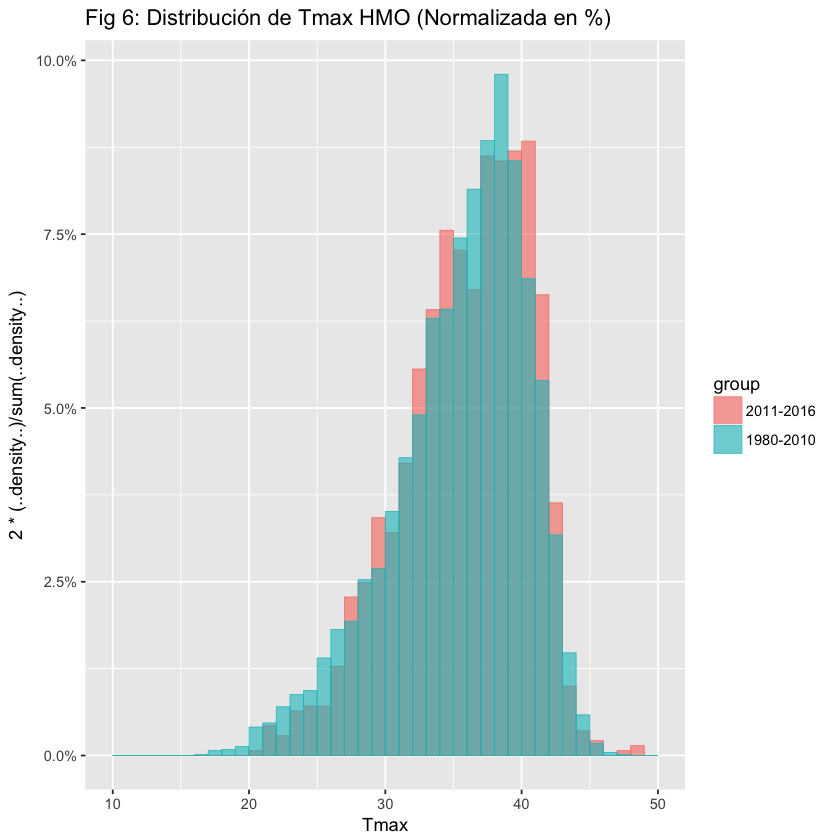

In [38]:
# La misma gráfica anterior pero en porcentaje de área
ggplot(dat, aes(x, fill=group, colour=group)) +
  geom_histogram(aes(y=2*(..density..)/sum(..density..)), breaks=seq(10,50,1), alpha=0.6, 
                 position="identity", lwd=0.2) +
  scale_y_continuous(labels=percent_format()) +
  ggtitle("Fig 6: Distribución de Tmax HMO (Normalizada en %)") +
  scale_x_continuous(name="Tmax", limits=c(10, 50))


Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

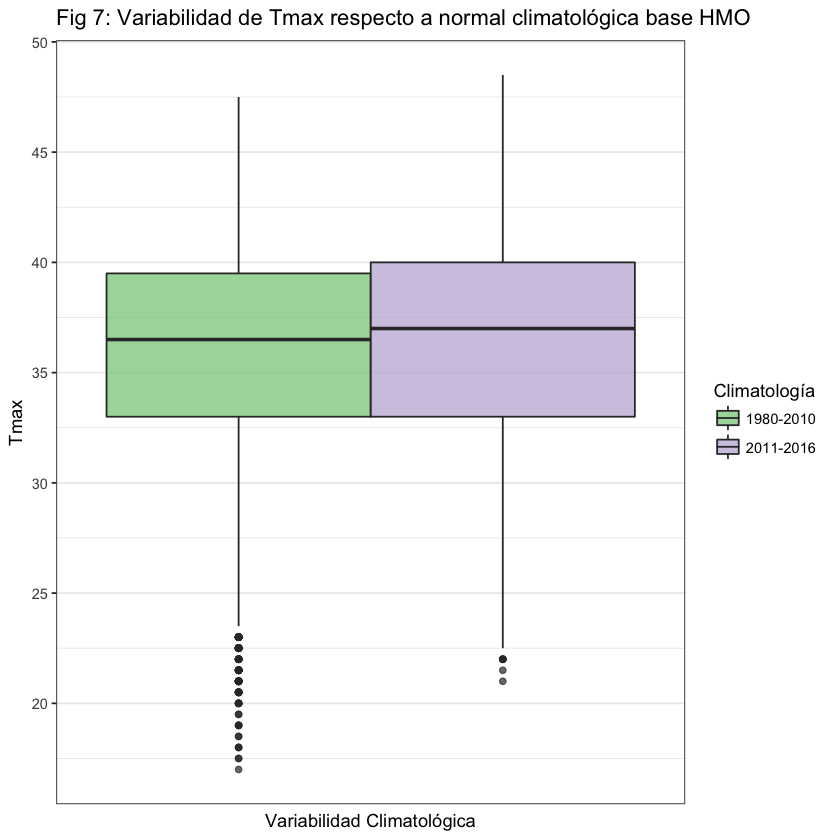

In [25]:
# Unir colecciones de datos 1980-2010 y 2011-2017 para hacer gráfica de cajas
# Nos mostrará la comparación de variabilidad de ambos periodos
datBox1 = data.frame(cbind(df2$Tmax, df2$Month), group="1980-2010")
datBox2 = data.frame(cbind(dfNew2$Tmax, dfNew2$Month), group="2011-2016")
datBox = rbind(datBox1, datBox2)
names(datBox) <- c("Tmax", "Mes", "Grupo")

# gráfica Boxplot comparando el perido reciente respecto a la climatología 1981-2010
p10 <- ggplot(datBox, aes(x = Mes, y = Tmax, fill = Grupo)) +
        geom_boxplot(alpha=0.7) +
        scale_y_continuous(name = "Tmax",
                           breaks = seq(10,50,5)) +
        scale_x_discrete(name = "Variabilidad Climatológica") +
        ggtitle("Fig 7: Variabilidad de Tmax respecto a normal climatológica base HMO") +
        theme_bw() +
        #theme(plot.title = element_text(size = 14, family = "Tahoma", face = "bold"),
        #      text = element_text(size = 12, family = "Tahoma"),
        #      axis.title = element_text(face="bold"),
        #      axis.text.x=element_text(size = 11)) +
        scale_fill_brewer(palette = "Accent") +
        labs(fill = "Climatología")
p10

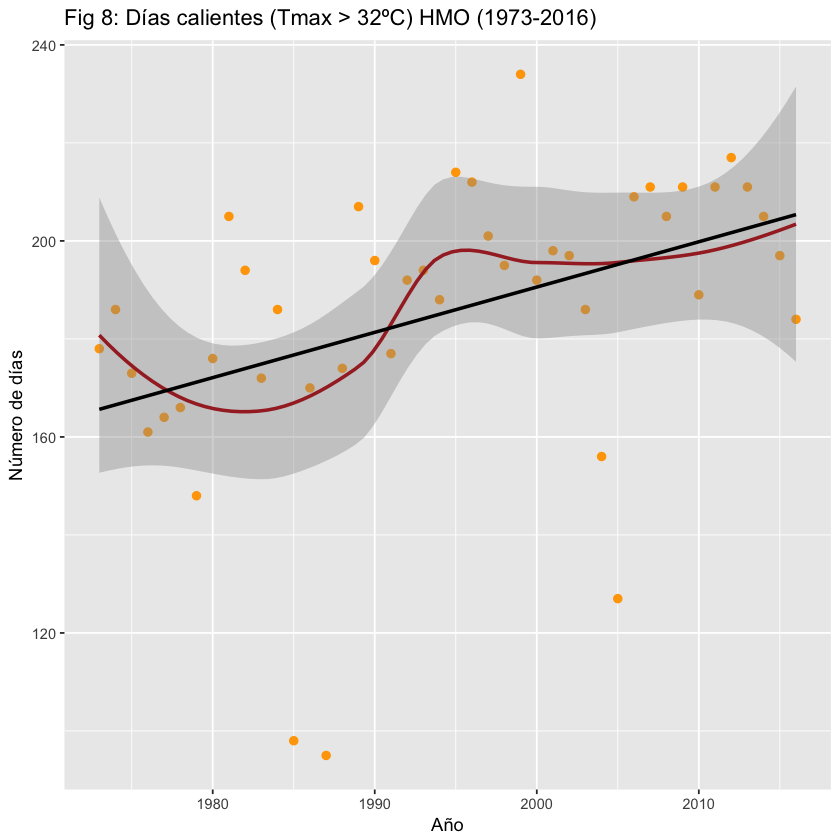

In [201]:
# Hacer un análisis de días calientes
# Number of hot days
Const <- list(T_lim_max = 32.0, T_lim_min=24.0)
hot_days <- c()
df1973 <- df0[(format.Date(df0$date, "%Y") == "1973" & !is.na(df0$date)),]
hot_days[1] <- nrow(subset(df1973, df1973$Tmax>Const[1]))
df1974 <- df0[(format.Date(df0$date, "%Y") == "1974" & !is.na(df0$date)),]
hot_days[2] <- nrow(subset(df1974, df1974$Tmax>Const[1]))
df1975 <- df0[(format.Date(df0$date, "%Y") == "1975" & !is.na(df0$date)),]
hot_days[3] <- nrow(subset(df1975, df1975$Tmax>Const[1]))
df1976 <- df0[(format.Date(df0$date, "%Y") == "1976" & !is.na(df0$date)),]
hot_days[4] <- nrow(subset(df1976, df1976$Tmax>Const[1]))
df1977 <- df0[(format.Date(df0$date, "%Y") == "1977" & !is.na(df0$date)),]
hot_days[5] <- nrow(subset(df1977, df1977$Tmax>Const[1]))
df1978 <- df0[(format.Date(df0$date, "%Y") == "1978" & !is.na(df0$date)),]
hot_days[6] <- nrow(subset(df1978, df1978$Tmax>Const[1]))
df1979 <- df0[(format.Date(df0$date, "%Y") == "1979" & !is.na(df0$date)),]
hot_days[7] <- nrow(subset(df1979, df1979$Tmax>Const[1]))
df1980 <- df0[(format.Date(df0$date, "%Y") == "1980" & !is.na(df0$date)),]
hot_days[8] <- nrow(subset(df1980, df1980$Tmax>Const[1]))
df1981 <- df0[(format.Date(df0$date, "%Y") == "1981" & !is.na(df0$date)),]
hot_days[9] <- nrow(subset(df1981, df1981$Tmax>Const[1]))
df1982 <- df0[(format.Date(df0$date, "%Y") == "1982" & !is.na(df0$date)),]
hot_days[10] <- nrow(subset(df1982, df1982$Tmax>Const[1]))
df1983 <- df0[(format.Date(df0$date, "%Y") == "1983" & !is.na(df0$date)),]
hot_days[11] <- nrow(subset(df1983, df1983$Tmax>Const[1]))
df1984 <- df0[(format.Date(df0$date, "%Y") == "1984" & !is.na(df0$date)),]
hot_days[12] <- nrow(subset(df1984, df1984$Tmax>Const[1]))
df1985 <- df0[(format.Date(df0$date, "%Y") == "1985" & !is.na(df0$date)),]
hot_days[13] <- nrow(subset(df1985, df1985$Tmax>Const[1]))
df1986 <- df0[(format.Date(df0$date, "%Y") == "1986" & !is.na(df0$date)),]
hot_days[14] <- nrow(subset(df1986, df1986$Tmax>Const[1]))
df1987 <- df0[(format.Date(df0$date, "%Y") == "1987" & !is.na(df0$date)),]
hot_days[15] <- nrow(subset(df1987, df1987$Tmax>Const[1]))
df1988 <- df0[(format.Date(df0$date, "%Y") == "1988" & !is.na(df0$date)),]
hot_days[16] <- nrow(subset(df1988, df1988$Tmax>Const[1]))
df1989 <- df0[(format.Date(df0$date, "%Y") == "1989" & !is.na(df0$date)),]
hot_days[17] <- nrow(subset(df1989, df1989$Tmax>Const[1]))
df1990 <- df0[(format.Date(df0$date, "%Y") == "1990" & !is.na(df0$date)),]
hot_days[18] <- nrow(subset(df1990, df1990$Tmax>Const[1]))
df1991 <- df0[(format.Date(df0$date, "%Y") == "1991" & !is.na(df0$date)),]
hot_days[19] <- nrow(subset(df1991, df1991$Tmax>Const[1]))
df1992 <- df0[(format.Date(df0$date, "%Y") == "1992" & !is.na(df0$date)),]
hot_days[20] <- nrow(subset(df1992, df1992$Tmax>Const[1]))
df1993 <- df0[(format.Date(df0$date, "%Y") == "1993" & !is.na(df0$date)),]
hot_days[21] <- nrow(subset(df1993, df1993$Tmax>Const[1]))
df1994 <- df0[(format.Date(df0$date, "%Y") == "1994" & !is.na(df0$date)),]
hot_days[22] <- nrow(subset(df1994, df1994$Tmax>Const[1]))
df1995 <- df0[(format.Date(df0$date, "%Y") == "1995" & !is.na(df0$date)),]
hot_days[23] <- nrow(subset(df1995, df1995$Tmax>Const[1]))
df1996 <- df0[(format.Date(df0$date, "%Y") == "1996" & !is.na(df0$date)),]
hot_days[24] <- nrow(subset(df1996, df1996$Tmax>Const[1]))
df1997 <- df0[(format.Date(df0$date, "%Y") == "1997" & !is.na(df0$date)),]
hot_days[25] <- nrow(subset(df1997, df1997$Tmax>Const[1]))
df1998 <- df0[(format.Date(df0$date, "%Y") == "1998" & !is.na(df0$date)),]
hot_days[26] <- nrow(subset(df1998, df1998$Tmax>Const[1]))
df1999 <- df0[(format.Date(df0$date, "%Y") == "1999" & !is.na(df0$date)),]
hot_days[27] <- nrow(subset(df1999, df1999$Tmax>Const[1]))
df2000 <- df0[(format.Date(df0$date, "%Y") == "2000" & !is.na(df0$date)),]
hot_days[28] <- nrow(subset(df2000, df2000$Tmax>Const[1])) 
df2001 <- df0[(format.Date(df0$date, "%Y") == "2001" & !is.na(df0$date)),]
hot_days[29] <- nrow(subset(df2001, df2001$Tmax>Const[1])) 
df2002 <- df0[(format.Date(df0$date, "%Y") == "2002" & !is.na(df0$date)),]
hot_days[30] <- nrow(subset(df2002, df2002$Tmax>Const[1])) 
df2003 <- df0[(format.Date(df0$date, "%Y") == "2003" & !is.na(df0$date)),]
hot_days[31] <- nrow(subset(df2003, df2003$Tmax>Const[1])) 
df2004 <- df0[(format.Date(df0$date, "%Y") == "2004" & !is.na(df0$date)),]
hot_days[32] <- nrow(subset(df2004, df2004$Tmax>Const[1])) 
df2005 <- df0[(format.Date(df0$date, "%Y") == "2005" & !is.na(df0$date)),]
hot_days[33] <- nrow(subset(df2005, df2005$Tmax>Const[1])) 
df2006 <- df0[(format.Date(df0$date, "%Y") == "2006" & !is.na(df0$date)),]
hot_days[34] <- nrow(subset(df2006, df2006$Tmax>Const[1])) 
df2007 <- df0[(format.Date(df0$date, "%Y") == "2007" & !is.na(df0$date)),]
hot_days[35] <- nrow(subset(df2007, df2007$Tmax>Const[1])) 
df2008 <- df0[(format.Date(df0$date, "%Y") == "2008" & !is.na(df0$date)),]
hot_days[36] <- nrow(subset(df2008, df2008$Tmax>Const[1])) 
df2009 <- df0[(format.Date(df0$date, "%Y") == "2009" & !is.na(df0$date)),]
hot_days[37] <- nrow(subset(df2009, df2009$Tmax>Const[1])) 
df2010 <- df0[(format.Date(df0$date, "%Y") == "2010" & !is.na(df0$date)),]
hot_days[38] <- nrow(subset(df2010, df2010$Tmax>Const[1])) 
df2011 <- df0[(format.Date(df0$date, "%Y") == "2011" & !is.na(df0$date)),]
hot_days[39] <- nrow(subset(df2011, df2011$Tmax>Const[1])) 
df2012 <- df0[(format.Date(df0$date, "%Y") == "2012" & !is.na(df0$date)),]
hot_days[40] <- nrow(subset(df2012, df2012$Tmax>Const[1])) 
df2013 <- df0[(format.Date(df0$date, "%Y") == "2013" & !is.na(df0$date)),]
hot_days[41] <- nrow(subset(df2013, df2013$Tmax>Const[1])) 
df2014 <- df0[(format.Date(df0$date, "%Y") == "2014" & !is.na(df0$date)),]
hot_days[42] <- nrow(subset(df2014, df2014$Tmax>Const[1])) 
df2015 <- df0[(format.Date(df0$date, "%Y") == "2015" & !is.na(df0$date)),]
hot_days[43] <- nrow(subset(df2015, df2015$Tmax>Const[1])) 
df2016 <- df0[(format.Date(df0$date, "%Y") == "2016" & !is.na(df0$date)),]
hot_days[44] <- nrow(subset(df2016, df2016$Tmax>Const[1])) 
hot_days <- data.frame(hot_days)
names(hot_days) <- c("Num_hot_days")
years_seq <- seq(1973, 2016)
hot_days_series <- cbind(years_seq, hot_days)
MA_hot_days <- TTR::EMA(hot_days_series$Num_hot_days, n=2, ratio=2/(5+1))
MA_hot_days_series <- data.frame(cbind(years_seq, MA_hot_days))
ggplot(hot_days_series, aes(years_seq, Num_hot_days)) +
           geom_point(na.rm=TRUE, color="orange", size=2) + 
           geom_smooth(method=loess, span = 0.4, color="brown") +
           geom_smooth(method = "lm", se=FALSE, color="black") +
           ggtitle("Fig 8: Días calientes (Tmax > 32ºC) HMO (1973-2016)") +
           xlab("Año") + ylab("Número de días")
#          + geom_line(data=MA_hot_days_series, aes(years_seq, MA_hot_days, colour="brown"), 
#                     show.legend=FALSE, size=2) 

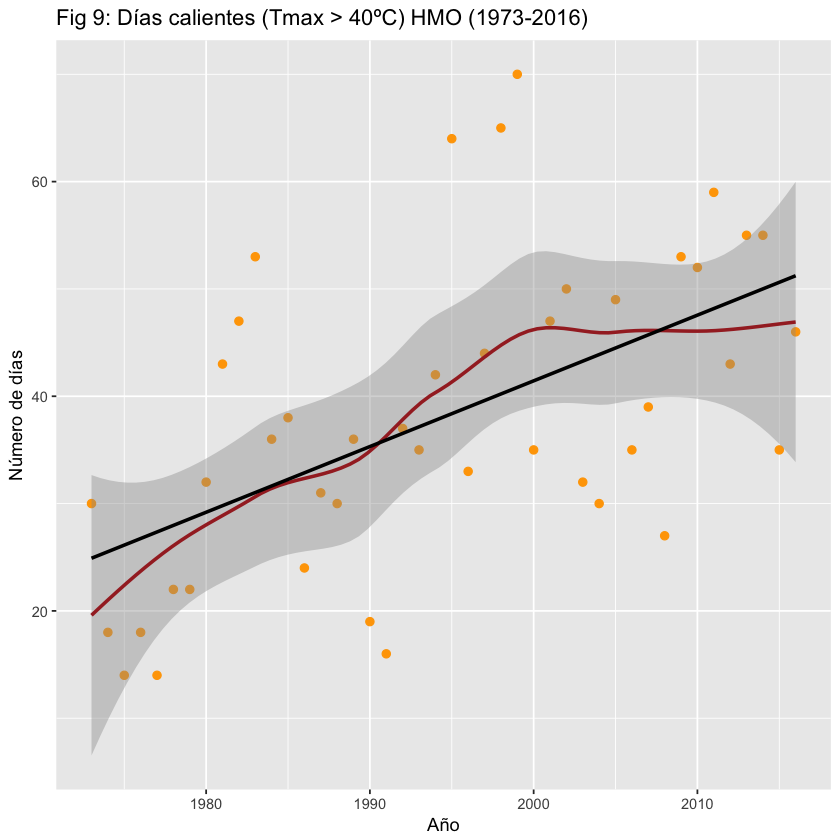

In [202]:
# Tmax > 40ºC
# Hacer un análisis de días calientes
# Número de días calientes
Const <- list(T_lim_max = 40.0, T_lim_min=24.0)
hot_days <- c()
df1973 <- df0[(format.Date(df0$date, "%Y") == "1973" & !is.na(df0$date)),]
hot_days[1] <- nrow(subset(df1973, df1973$Tmax>Const[1]))
df1974 <- df0[(format.Date(df0$date, "%Y") == "1974" & !is.na(df0$date)),]
hot_days[2] <- nrow(subset(df1974, df1974$Tmax>Const[1]))
df1975 <- df0[(format.Date(df0$date, "%Y") == "1975" & !is.na(df0$date)),]
hot_days[3] <- nrow(subset(df1975, df1975$Tmax>Const[1]))
df1976 <- df0[(format.Date(df0$date, "%Y") == "1976" & !is.na(df0$date)),]
hot_days[4] <- nrow(subset(df1976, df1976$Tmax>Const[1]))
df1977 <- df0[(format.Date(df0$date, "%Y") == "1977" & !is.na(df0$date)),]
hot_days[5] <- nrow(subset(df1977, df1977$Tmax>Const[1]))
df1978 <- df0[(format.Date(df0$date, "%Y") == "1978" & !is.na(df0$date)),]
hot_days[6] <- nrow(subset(df1978, df1978$Tmax>Const[1]))
df1979 <- df0[(format.Date(df0$date, "%Y") == "1979" & !is.na(df0$date)),]
hot_days[7] <- nrow(subset(df1979, df1979$Tmax>Const[1]))
df1980 <- df0[(format.Date(df0$date, "%Y") == "1980" & !is.na(df0$date)),]
hot_days[8] <- nrow(subset(df1980, df1980$Tmax>Const[1]))
df1981 <- df0[(format.Date(df0$date, "%Y") == "1981" & !is.na(df0$date)),]
hot_days[9] <- nrow(subset(df1981, df1981$Tmax>Const[1]))
df1982 <- df0[(format.Date(df0$date, "%Y") == "1982" & !is.na(df0$date)),]
hot_days[10] <- nrow(subset(df1982, df1982$Tmax>Const[1]))
df1983 <- df0[(format.Date(df0$date, "%Y") == "1983" & !is.na(df0$date)),]
hot_days[11] <- nrow(subset(df1983, df1983$Tmax>Const[1]))
df1984 <- df0[(format.Date(df0$date, "%Y") == "1984" & !is.na(df0$date)),]
hot_days[12] <- nrow(subset(df1984, df1984$Tmax>Const[1]))
df1985 <- df0[(format.Date(df0$date, "%Y") == "1985" & !is.na(df0$date)),]
hot_days[13] <- nrow(subset(df1985, df1985$Tmax>Const[1]))
df1986 <- df0[(format.Date(df0$date, "%Y") == "1986" & !is.na(df0$date)),]
hot_days[14] <- nrow(subset(df1986, df1986$Tmax>Const[1]))
df1987 <- df0[(format.Date(df0$date, "%Y") == "1987" & !is.na(df0$date)),]
hot_days[15] <- nrow(subset(df1987, df1987$Tmax>Const[1]))
df1988 <- df0[(format.Date(df0$date, "%Y") == "1988" & !is.na(df0$date)),]
hot_days[16] <- nrow(subset(df1988, df1988$Tmax>Const[1]))
df1989 <- df0[(format.Date(df0$date, "%Y") == "1989" & !is.na(df0$date)),]
hot_days[17] <- nrow(subset(df1989, df1989$Tmax>Const[1]))
df1990 <- df0[(format.Date(df0$date, "%Y") == "1990" & !is.na(df0$date)),]
hot_days[18] <- nrow(subset(df1990, df1990$Tmax>Const[1]))
df1991 <- df0[(format.Date(df0$date, "%Y") == "1991" & !is.na(df0$date)),]
hot_days[19] <- nrow(subset(df1991, df1991$Tmax>Const[1]))
df1992 <- df0[(format.Date(df0$date, "%Y") == "1992" & !is.na(df0$date)),]
hot_days[20] <- nrow(subset(df1992, df1992$Tmax>Const[1]))
df1993 <- df0[(format.Date(df0$date, "%Y") == "1993" & !is.na(df0$date)),]
hot_days[21] <- nrow(subset(df1993, df1993$Tmax>Const[1]))
df1994 <- df0[(format.Date(df0$date, "%Y") == "1994" & !is.na(df0$date)),]
hot_days[22] <- nrow(subset(df1994, df1994$Tmax>Const[1]))
df1995 <- df0[(format.Date(df0$date, "%Y") == "1995" & !is.na(df0$date)),]
hot_days[23] <- nrow(subset(df1995, df1995$Tmax>Const[1]))
df1996 <- df0[(format.Date(df0$date, "%Y") == "1996" & !is.na(df0$date)),]
hot_days[24] <- nrow(subset(df1996, df1996$Tmax>Const[1]))
df1997 <- df0[(format.Date(df0$date, "%Y") == "1997" & !is.na(df0$date)),]
hot_days[25] <- nrow(subset(df1997, df1997$Tmax>Const[1]))
df1998 <- df0[(format.Date(df0$date, "%Y") == "1998" & !is.na(df0$date)),]
hot_days[26] <- nrow(subset(df1998, df1998$Tmax>Const[1]))
df1999 <- df0[(format.Date(df0$date, "%Y") == "1999" & !is.na(df0$date)),]
hot_days[27] <- nrow(subset(df1999, df1999$Tmax>Const[1]))
df2000 <- df0[(format.Date(df0$date, "%Y") == "2000" & !is.na(df0$date)),]
hot_days[28] <- nrow(subset(df2000, df2000$Tmax>Const[1])) 
df2001 <- df0[(format.Date(df0$date, "%Y") == "2001" & !is.na(df0$date)),]
hot_days[29] <- nrow(subset(df2001, df2001$Tmax>Const[1])) 
df2002 <- df0[(format.Date(df0$date, "%Y") == "2002" & !is.na(df0$date)),]
hot_days[30] <- nrow(subset(df2002, df2002$Tmax>Const[1])) 
df2003 <- df0[(format.Date(df0$date, "%Y") == "2003" & !is.na(df0$date)),]
hot_days[31] <- nrow(subset(df2003, df2003$Tmax>Const[1])) 
df2004 <- df0[(format.Date(df0$date, "%Y") == "2004" & !is.na(df0$date)),]
hot_days[32] <- nrow(subset(df2004, df2004$Tmax>Const[1])) 
df2005 <- df0[(format.Date(df0$date, "%Y") == "2005" & !is.na(df0$date)),]
hot_days[33] <- nrow(subset(df2005, df2005$Tmax>Const[1])) 
df2006 <- df0[(format.Date(df0$date, "%Y") == "2006" & !is.na(df0$date)),]
hot_days[34] <- nrow(subset(df2006, df2006$Tmax>Const[1])) 
df2007 <- df0[(format.Date(df0$date, "%Y") == "2007" & !is.na(df0$date)),]
hot_days[35] <- nrow(subset(df2007, df2007$Tmax>Const[1])) 
df2008 <- df0[(format.Date(df0$date, "%Y") == "2008" & !is.na(df0$date)),]
hot_days[36] <- nrow(subset(df2008, df2008$Tmax>Const[1])) 
df2009 <- df0[(format.Date(df0$date, "%Y") == "2009" & !is.na(df0$date)),]
hot_days[37] <- nrow(subset(df2009, df2009$Tmax>Const[1])) 
df2010 <- df0[(format.Date(df0$date, "%Y") == "2010" & !is.na(df0$date)),]
hot_days[38] <- nrow(subset(df2010, df2010$Tmax>Const[1])) 
df2011 <- df0[(format.Date(df0$date, "%Y") == "2011" & !is.na(df0$date)),]
hot_days[39] <- nrow(subset(df2011, df2011$Tmax>Const[1])) 
df2012 <- df0[(format.Date(df0$date, "%Y") == "2012" & !is.na(df0$date)),]
hot_days[40] <- nrow(subset(df2012, df2012$Tmax>Const[1])) 
df2013 <- df0[(format.Date(df0$date, "%Y") == "2013" & !is.na(df0$date)),]
hot_days[41] <- nrow(subset(df2013, df2013$Tmax>Const[1])) 
df2014 <- df0[(format.Date(df0$date, "%Y") == "2014" & !is.na(df0$date)),]
hot_days[42] <- nrow(subset(df2014, df2014$Tmax>Const[1])) 
df2015 <- df0[(format.Date(df0$date, "%Y") == "2015" & !is.na(df0$date)),]
hot_days[43] <- nrow(subset(df2015, df2015$Tmax>Const[1])) 
df2016 <- df0[(format.Date(df0$date, "%Y") == "2016" & !is.na(df0$date)),]
hot_days[44] <- nrow(subset(df2016, df2016$Tmax>Const[1])) 
hot_days <- data.frame(hot_days)
names(hot_days) <- c("Num_hot_days")
years_seq <- seq(1973, 2016)
hot_days_series <- cbind(years_seq, hot_days)
MA_hot_days <- TTR::EMA(hot_days_series$Num_hot_days, n=2, ratio=2/(5+1))
MA_hot_days_series <- data.frame(cbind(years_seq, MA_hot_days))
ggplot(hot_days_series, aes(years_seq, Num_hot_days)) +
           geom_point(na.rm=TRUE, color="orange", size=2) + 
           geom_smooth(method=loess, span = 0.4, color="brown") +
            geom_smooth(method = "lm", se=FALSE, color="black") +
           ggtitle("Fig 9: Días calientes (Tmax > 40ºC) HMO (1973-2016)") +
           xlab("Año") + ylab("Número de días")

ERROR: Error in xy.coords(x, y): 'x' and 'y' lengths differ


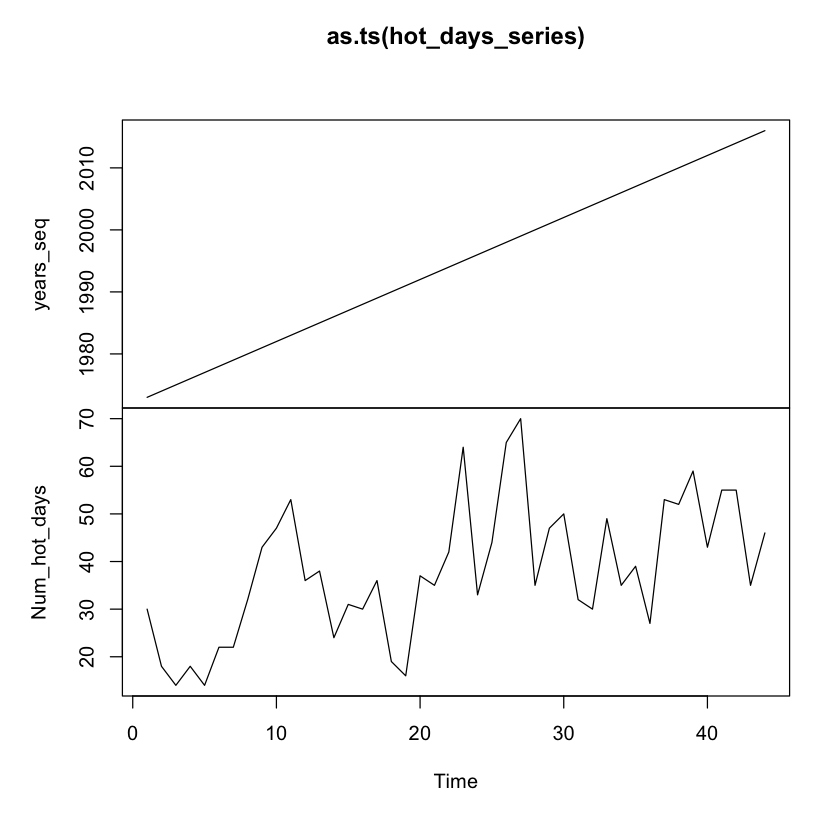

In [197]:
library(forecast)
trend_HMO = ma(hot_days_series, order = 20, centre = T)
plot(as.ts(hot_days_series))
lines(trend_HMO)
plot(as.ts(trend_HMO))

In [120]:
require(tseries)
adf.test(hot_days_series$Num_hot_days)

Loading required package: tseries



	Augmented Dickey-Fuller Test

data:  hot_days_series$Num_hot_days
Dickey-Fuller = -3.3918, Lag order = 3, p-value = 0.07056
alternative hypothesis: stationary


In [53]:
# Pendiente
#

# Gráfica estilo NYT
df0NYT<-data.frame(df0)
df0NYT_tmp <- df0NYT[(format.Date(df0NYT$date, "%Y") >= "1981" & !is.na(df0NYT$date)),]
df1NYT <- df0NYT_tmp[(format.Date(df0NYT_tmp$date, "%Y") <= "2010" & !is.na(df0NYT_tmp$date)),]
df1NYT$Ndate <- format(as.Date(df1NYT$date, format = "%Y-%m-%d"), "%m-%d")
df1NYT$Ndate <- as.factor(df1NYT$Ndate)

In [54]:
str(df1NYT)

'data.frame':	9990 obs. of  6 variables:
 $ date  : chr  "1981-01-01" "1981-01-02" "1981-01-03" "1981-01-04" ...
 $ Precip: num  0 0 0 0 0 32 1.8 0 0 0 ...
 $ Evap  : num  4.1 5.2 3.7 5.3 3.5 5.4 2 0.6 2 2.7 ...
 $ Tmax  : num  29 27.5 30 30 24.5 24.5 20 22 24.5 25.5 ...
 $ Tmin  : num  13 12.5 12 14.5 15 16 15.5 12 12 13 ...
 $ Ndate : Factor w/ 366 levels "01-01","01-02",..: 1 2 3 4 5 6 7 8 9 10 ...


In [ ]:
# Segunda parte (Pendiente)

In [ ]:
dfNew0 <- read.csv(file="TEMP_Hillo_2011-2017.csv", header=F, sep=",", stringsAsFactors=FALSE, skip=2)
df2011 <- cbind(dfNew0$V1, dfNew0$V2, dfNew0$V3)
df2012 <- cbind(dfNew0$V4, dfNew0$V5, dfNew0$V6)
df2013 <- cbind(dfNew0$V7, dfNew0$V8, dfNew0$V9)
df2014 <- cbind(dfNew0$V10, dfNew0$V11, dfNew0$V12)
df2015 <- cbind(dfNew0$V13, dfNew0$V14, dfNew0$V15)
df2016 <- cbind(dfNew0$V16, dfNew0$V17, dfNew0$V18)
df2017 <- cbind(dfNew0$V19, dfNew0$V20, dfNew0$V21) 
df2011_2017 <- data.frame(rbind(df2011, df2012, df2013, df2014, df2015, df2016))
names(df2011_2017) <- c("date", "Tmax", "Tmin")
df2011_2017$Tmax <- as.numeric(df2011_2017$Tmax)
df2011_2017$Tmin <- as.numeric(df2011_2017$Tmin)
df2011_2017$date <- format(as.Date(df2011_2017$date, format = "%d/%m/%Y"), "%Y-%m-%d")

In [ ]:
require(lubridate)
# Seleccionar datos de Abril a Noviembre 
df1_temp1 <- df2011_2017[(format.Date(df2011_2017$date, "%m") >= "04" & !is.na(df2011_2017$date)),]
df1N <- df1_temp1[(format.Date(df1_temp1$date, "%m") <= "11" & !is.na(df1_temp1$date)),]
# Seleccionar los datos entre los años 1981 y 2010
#df1_tmp2 <- df1[(format.Date(df1$date, "%Y") >= "1981" & !is.na(df1$date)),]
#df2 <- df1_tmp2[(format.Date(df1_tmp2$date, "%Y") <= "2010" & !is.na(df1_tmp2$date)),]

# Agregar clasificación por mes
df1N$Month <- factor(month(df1N$date),
                         labels = c("Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov"))

In [ ]:
# Explorar datos: min, cuartiles, promedio, máximo
MaxT2 <- df1N$Tmax
summary(MaxT2)
# Tomar el valor promedio para insertarlo en la posición de la línea vertical 
# en el histograma de abajo


In [ ]:
head(df2011)


In [ ]:
tail(df2011)